In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv("Crop_recommendation.csv")
print(df.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [5]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

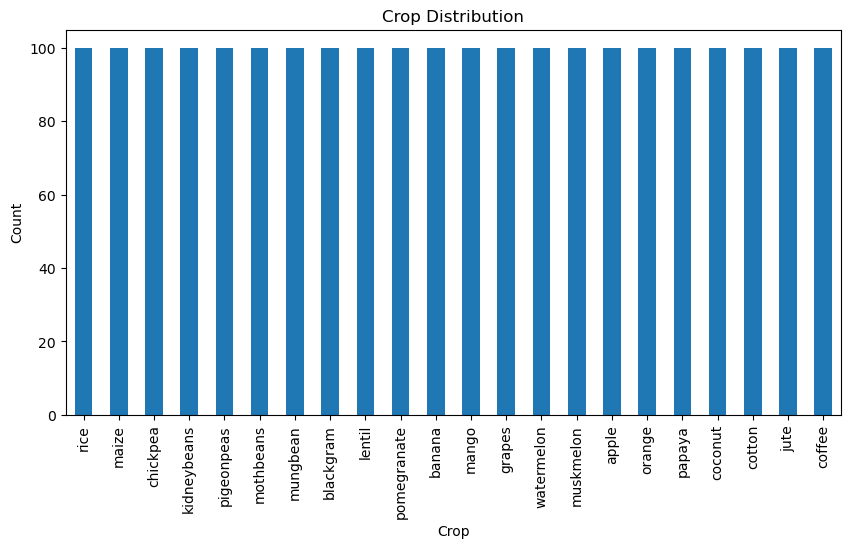

In [7]:
plt.figure(figsize=(10,5))
df['label'].value_counts().plot(kind='bar')
plt.title("Crop Distribution")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.show()


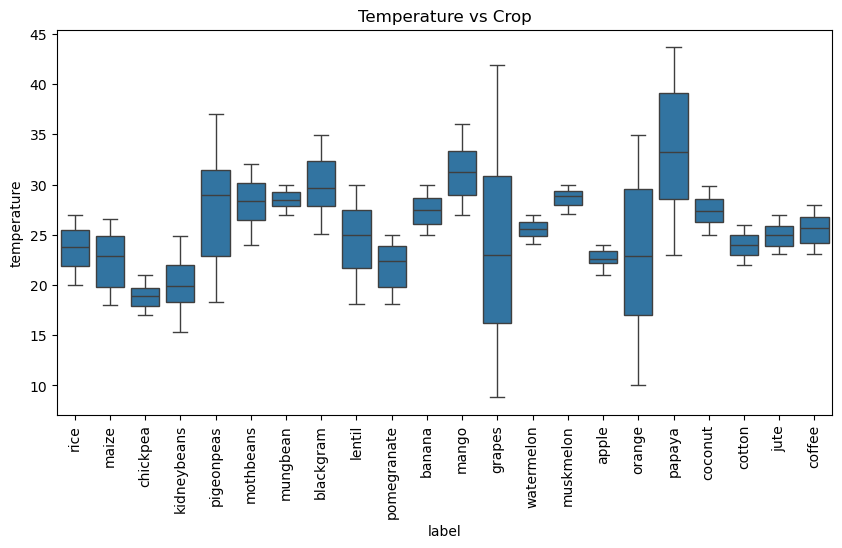

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='label', y='temperature', data=df)
plt.xticks(rotation=90)
plt.title("Temperature vs Crop")
plt.show()


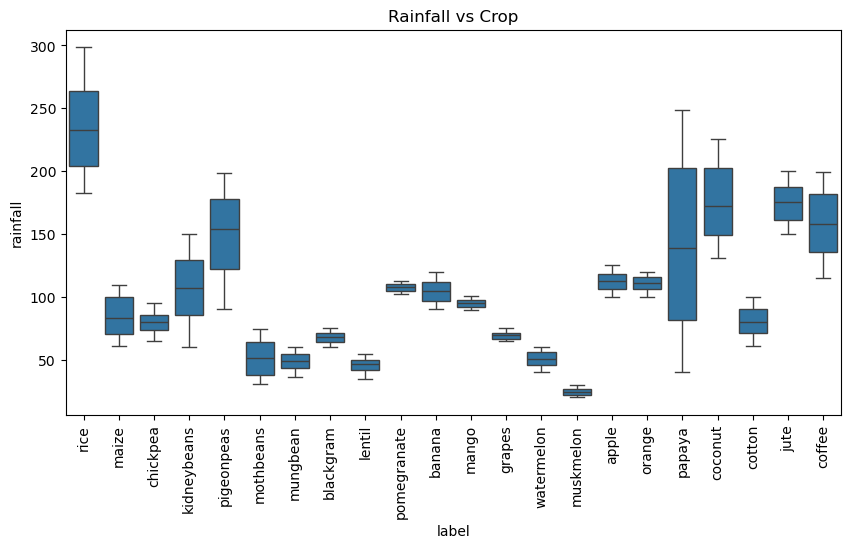

In [101]:
plt.figure(figsize=(10,5))
sns.boxplot(x='label', y='rainfall', data=df)
plt.xticks(rotation=90)
plt.title("Rainfall vs Crop")
plt.show()


In [102]:
X = df.drop('label', axis=1)
y = df['label']


In [103]:
print(X.head())

    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340


In [104]:
print(y.head())

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y #equal proportion of each class
)

In [106]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)

In [116]:
print(X_train_scaled.mean())

N              2.826022e-17
P              8.074349e-17
K              5.551115e-17
temperature   -2.826022e-16
humidity      -1.463476e-16
ph            -4.521636e-16
rainfall       2.220446e-16
dtype: float64


In [118]:
print(X_train_scaled.std())

N              1.000284
P              1.000284
K              1.000284
temperature    1.000284
humidity       1.000284
ph             1.000284
rainfall       1.000284
dtype: float64


In [115]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [107]:
print(X_test_scaled.mean())

N              0.000555
P              0.003484
K              0.000583
temperature    0.006728
humidity       0.014595
ph            -0.027776
rainfall       0.001097
dtype: float64


In [108]:
print(X_test_scaled.std())

N              1.008802
P              1.007217
K              0.995400
temperature    0.984920
humidity       0.997509
ph             0.939816
rainfall       0.998304
dtype: float64


In [109]:
knn = KNeighborsClassifier(  #creating knn model 
    n_neighbors=7,              #value of k
    weights='distance'       #improves accuarcy
)
knn.fit(X_train_scaled, y_train)  #x_train_scaled=soil and climate
                                # y_train=crops

,n_neighbors,7
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [110]:
y_pred = knn.predict(X_test_scaled)

In [111]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(
    y_test,
    y_pred,
    zero_division=0
))

Accuracy: 0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      0.90      0.95        2

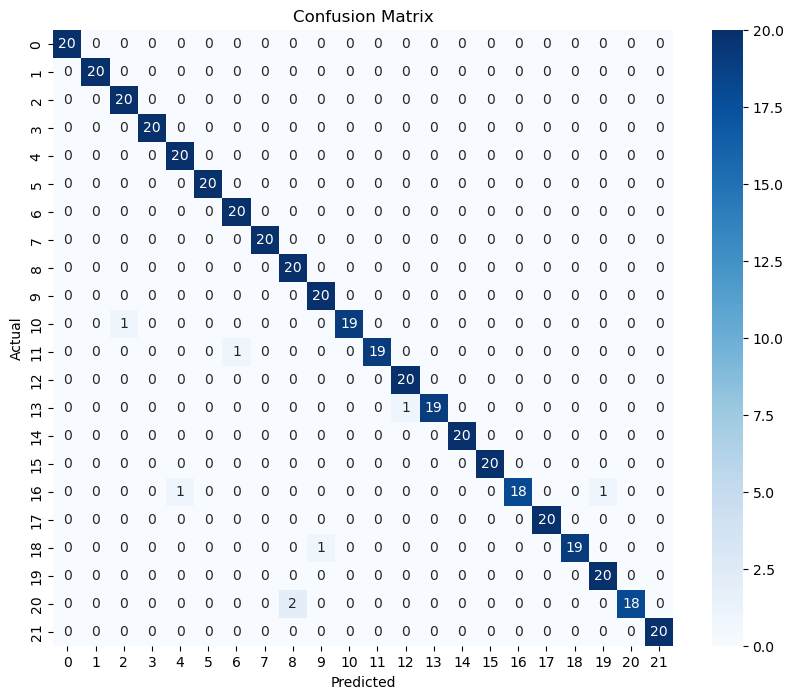

In [114]:
cm = confusion_matrix(y_test, y_pred)
#rows=actual crops columns=Predicted crops
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [113]:
sample = pd.DataFrame(
    [[83,45,21,18.83,58.75,5.71,79.75]],
    columns=X.columns
)
sample_scaled = pd.DataFrame(
    scaler.transform(sample),
    columns=X.columns
)
prediction = knn.predict(sample_scaled)
print("Recommended Crop:", prediction[0])


Recommended Crop: maize
